In [1]:
import gzip,os,tarfile,sys
sys.path.append(os.pardir+'/src')
from settings import *
from boto3.session import Session
import datetime
import traceback
import logging
import pandas as pd
from pandas import DataFrame
import xml.etree.ElementTree as et
%matplotlib inline 

In [2]:
#　全ファイル取得
files_2014 = os.listdir(DATA_DIR+'/EID42186/myCsv/2014')
files_2015 = os.listdir(DATA_DIR+'/EID42186/myCsv/2015')
files_2016 = os.listdir(DATA_DIR+'/EID42186/myCsv/2016')

In [4]:
remarkers = []
for file in files_2014:
    csv = pd.read_csv(os.path.join(DATA_DIR,'EID42186/myCsv/2014',file.replace(".xml.gz",".csv"))).drop(['Id', 'TimeOfArrival','Body'],axis=1)
    for headline in csv['Headline']:
        if(len(headline.split('：')) > 1):
            remarkers.append(headline.split('：')[0].replace('*',''))
for file in files_2015:
    csv = pd.read_csv(os.path.join(DATA_DIR,'EID42186/myCsv/2015',file.replace(".xml.gz",".csv"))).drop(['Id', 'TimeOfArrival','Body'],axis=1)
    for headline in csv['Headline']:
        if(len(headline.split('：')) > 1):
            remarkers.append(headline.split('：')[0].replace('*',''))
for file in files_2016:
    csv = pd.read_csv(os.path.join(DATA_DIR,'EID42186/myCsv/2016',file.replace(".xml.gz",".csv"))).drop(['Id', 'TimeOfArrival','Body'],axis=1)
    for headline in csv['Headline']:
        if(len(headline.split('：')) > 1):
            remarkers.append(headline.split('：')[0].replace('*',''))

In [5]:
len(remarkers)

125829

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer().fit(remarkers) # stop_words = ''
bow = vectorizer.transform(remarkers)
print(bow.get_shape())

(125829, 10022)


In [20]:
# 綺麗に書き換えられるはず
freqs = [(word, bow.getcol(idx).sum()) for word, idx in vectorizer.vocabulary_.items()]
order = sorted(freqs, key = lambda x: -x[1]) # tapleのlist
terms = []
nums = []
for a, b in order:
    terms.append(a)
    nums.append(b)

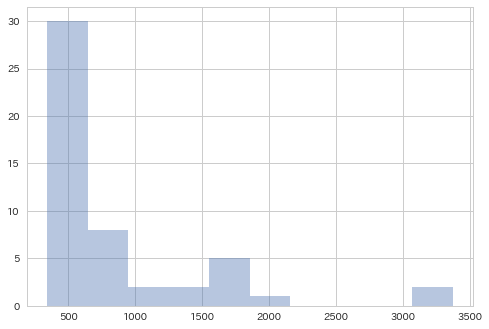

In [21]:
import seaborn as sns
sns.distplot(nums[0:50], kde=False, rug=False, bins=10) 

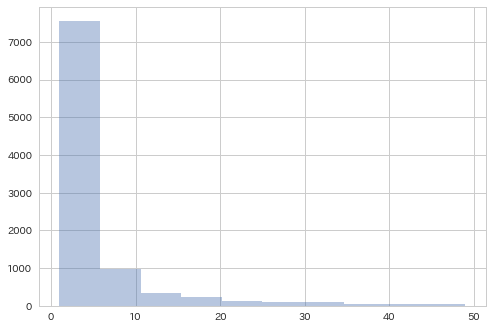

In [22]:
sns.distplot([x for x in nums if x < 50], kde=False, rug=False, bins=10) 

In [102]:
#ここまで
len([x for x in nums if x > 50])

399

上記の値までvalidationに0,1を降る。それ以降は全て0。

In [99]:
# 上書きしないように

#import csv
#f=open('../data/EID42186/remakers.csv','w')
#f.write('remarkers,validation,num of remarks\n')
#for x in terms:
#    f.write(x+',\n')
#f.close()

In [68]:
len(remarkers)

125829

In [96]:
hoge=pd.read_csv('../data/EID42186/remakers.csv')

In [97]:
hoge['num of remarks'] = nums 

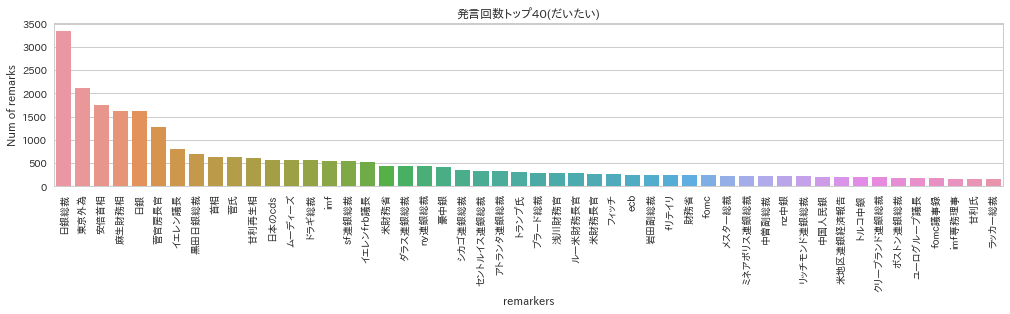

In [93]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
fig = plt.figure(figsize=(17,3))
ax = fig.add_subplot(1,1,1)


numOfRemarker=50

ax.set_xticklabels(hoge[hoge['validation']==1][:numOfRemarker]['remarkers'], rotation = 90)

font_path = '/usr/share/fonts/truetype/takao-gothic/TakaoPGothic.ttf'
font_prop = FontProperties(fname=font_path)
matplotlib.rcParams['font.family'] = font_prop.get_name()
sns.barplot(x=hoge[hoge['validation']==1][:numOfRemarker]['remarkers'], y=hoge[hoge['validation']==1][:numOfRemarker]['num of remarks'])

plt.title('発言回数トップ40(だいたい)')
plt.xlabel=('remarkers')
plt.ylabel('Num of remarks')

# Problem : エイリアスが存在。人がheadlineにないニュースを（10年歳入札結果など）とっていない。翻訳記事の内容が原文へのリンクだけ→dropduplicatesの際の問題かも

In [ ]:
# 以下#発言者、発言内容、記事ID、タイムスタンプのデータの作成

現状、発言内容はBodyその作成まま

In [169]:
#df = pd.DataFrame(index=[], columns=['remarker', 'remark(Body)','Id', 'TimeStamp'])
df = pd.DataFrame(index=[], columns=['Id', 'Headline','Body', 'TimeOfArrival'])

In [170]:
for file in files_2014:
    csv = pd.read_csv(os.path.join(DATA_DIR,'EID42186/myCsv/2014',file.replace(".xml.gz",".csv")))
    df = pd.concat([df, csv], ignore_index=True)
for file in files_2015:
    csv = pd.read_csv(os.path.join(DATA_DIR,'EID42186/myCsv/2015',file.replace(".xml.gz",".csv")))
    df = pd.concat([df, csv], ignore_index=True)
for file in files_2016:
    csv = pd.read_csv(os.path.join(DATA_DIR,'EID42186/myCsv/2016',file.replace(".xml.gz",".csv")))
    df = pd.concat([df, csv], ignore_index=True)

In [180]:
df = df[df['Headline'].map(lambda x: len(x.split('：'))>1)]
df['Headline'] = df['Headline'].apply(lambda x: x.split('：')[0].replace('*',''))
df = df.ix[:,['Headline','Body','Id', 'TimeOfArrival']]
df.columns = ['remarker', 'remark(Body)','Id', 'TimeOfArrival']
df.head()

/home/yutaro/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  


,remarker,remark(Body),Id,TimeOfArrival
22,テンプＨＤ,--NORIKO TSUTSUMI\r\n\r\n-0- Nov/06/2014 00:13...,NELCLX6K50YQ,2014-11-06T00:13:09.113+00:00
33,Ｓ＆Ｐ,\r\n【記者：Cara Moffat】\r\n 11月５日（ブルームバーグ）： Ｓ＆Ｐ...,NELD116K50YV,2014-11-06T00:22:13.131+00:00
34,テンプＨＤ,\r\n【記者：山村敬一】\r\n 11月６日（ブルームバーグ）： 進めているが現時点で...,NELD1R6K513H,2014-11-06T00:22:39.569+00:00
39,短期市場見通し,\r\n【記者：船曳三郎】\r\n 11月６日（ブルームバーグ）： 追加緩和後の短国オペ動...,NEL88M6K50Y5,2014-11-05T22:38:46.613+00:00
42,バーナンキ氏,\r\n【記者：Colin Keatinge】\r\n 11月６日（ブルームバーグ）：\r...,NELDQA6K50YI,2014-11-06T00:37:22.761+00:00


In [181]:
df.to_csv('../data/EID42186/nak_task1_data.csv',encoding='utf8',header=True,index=False)